<h1>Session 12 - Fully tuned Decision Tree - Churn</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from statsmodels.discrete.discrete_model import Logit 
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from  sklearn.metrics import recall_score

In [2]:
data=pd.read_excel('Churn.xls')
data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [3]:
#no missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account Length    3333 non-null int64
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Eve Mins          3333 non-null float64
Night Mins        3333 non-null float64
Intl Mins         3333 non-null float64
CustServ Calls    3333 non-null int64
Churn             3333 non-null int64
Int'l Plan        3333 non-null int64
VMail Plan        3333 non-null int64
Day Calls         3333 non-null int64
Day Charge        3333 non-null float64
Eve Calls         3333 non-null int64
Eve Charge        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null float64
Intl Calls        3333 non-null int64
Intl Charge       3333 non-null float64
State             3333 non-null object
Area Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(11), object(2)
memory usage: 546.9+ KB


In [4]:
data_numeric = data.select_dtypes(exclude="object")
data_object = data.select_dtypes(include="object")

In [5]:
#checking for 0 variance
#there is no variable with 0 var, so we will keep all numeric variables
print(data_numeric.var()==0)

Account Length    False
VMail Message     False
Day Mins          False
Eve Mins          False
Night Mins        False
Intl Mins         False
CustServ Calls    False
Churn             False
Int'l Plan        False
VMail Plan        False
Day Calls         False
Day Charge        False
Eve Calls         False
Eve Charge        False
Night Calls       False
Night Charge      False
Intl Calls        False
Intl Charge       False
Area Code         False
dtype: bool


In [6]:
#checking to see whether there is object variable with one category, if there is one, we should remove
for i in data_object.columns:
    print(data_object[i].unique())

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
['382-4657' '371-7191' '358-1921' ... '328-8230' '364-6381' '400-4344']


In [7]:
data_object=data_object.drop(columns="Phone")

In [8]:
#converting object variables into dummy variables
data_dummies=pd.get_dummies(data_object,prefix=data_object.columns,drop_first=True)
data_final=data_numeric.join(data_dummies)

# Decision Tree

In [10]:
#let's see percenatage of employees who didn't churn,
#and percenatage of employees who churned 
print(data_final.Churn.value_counts()/len(data_final)*100)

0    85.508551
1    14.491449
Name: Churn, dtype: float64


<b>About 85.5% of customers didn't churn.This means that without any model we will probably clasify a new record (a new customer) as 0 with accuracy of 85.5%, but we want to do better than this very naive classification.</b>

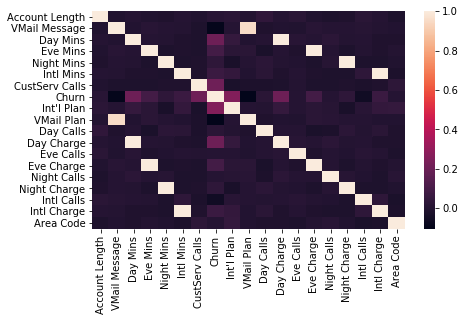

In [11]:
plt.figure(figsize=(7,4))
sns.heatmap(data.corr())
plt.show()

# Train, Test Split

In [12]:
Y=data_final.Churn
X=data_final.drop("Churn",axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

# Tree 1- With Default Parameters

In [13]:
#running and fitting DT
tree_1=DecisionTreeClassifier(random_state=42)
tree_1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [14]:
#to check accuracy scores for training and testing data to see that testing set solves overfitting problem
print("Train:",tree_1.score(x_train,y_train)*100)
print("Test:",tree_1.score(x_test,y_test).round(2)*100)

Train: 100.0
Test: 91.0


In [21]:
#to calculate before constructing confusion matrix
y_pred = tree_1.predict(x_test)

In [22]:
cm=confusion_matrix(y_test, y_pred)

In [31]:
cm=pd.DataFrame(cm,columns=["Predicted_0", "Predicted_1"], index=["Real_0", "Real_1"]).T
print(cm)

             Real_0  Real_1
Predicted_0     669      33
Predicted_1      40      92


In [42]:
#manually calculating True Positive Rate (Sensitivity/Recall)
recall=cm.Real_1.iloc[1]/(sum(cm.Real_1))*100
print("Recall or TPR or Sensitivity calculated manually:",recall)

Recall or TPR or Sensitivity calculated manually: 73.6


In [50]:
#sensitivity (TPR) from recall_score() function
print("Recall or TPR or Sensitivity:",recall_score(y_test,y_pred)*100)

Recall or TPR or Sensitivity: 73.6


In [59]:
#confusion matrix, recall (1) is sensitivity (TPR) and recall(0) is specificity (TNR)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.94      0.95       709
          1       0.70      0.74      0.72       125

avg / total       0.91      0.91      0.91       834



# Tree 2 - Parameters of tree are set manually

In [60]:
#let's cut the tree and check accuarcy again, the values for max_depth and min_samples_leaf were chosen just arbitrary
tree_2=DecisionTreeClassifier(max_depth=5,min_samples_leaf=50,random_state=42)
tree_2.fit(x_train,y_train)
print("Train:", tree_2.score(x_train,y_train).round(2)*100)
print("Test:", tree_2.score(x_test,y_test).round(2)*100)

Train: 92.0
Test: 90.0


In [61]:
y_pred2=tree_2.predict(x_test)
print("Recall2",recall_score(y_test, y_pred2)*100)

Recall2 71.2


# Tree 3- Using cross-validation to get best hyper-parametrs: max_depth and min_samples_leaf

In [62]:
#let's use GridSearchCV to get best values for parameters in defined ranges
tree3=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=tree3,param_grid={'max_depth': range(3,10),"min_samples_leaf":range(10,100)},cv=5, n_jobs=-1)
grid_search.fit(X,Y) #as the CV is splitting the data into training and testing sets, the whole data should be inputted here

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(3, 10), 'min_samples_leaf': range(10, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [72]:
#getting best parameters and best score for that parameters on training set 
print("Best Score: {0}".format(grid_search.best_score_.round(2)*100,grid_search.best_params_))
print("Best params: {0}".format(grid_search.best_params_))

Best Score: 94.0
Best params: {'max_depth': 8, 'min_samples_leaf': 10}


In [73]:
#let's again run model with best parameters and get accuarcy score
tree3_1=DecisionTreeClassifier(max_depth=8,min_samples_leaf=10,random_state=42)
tree3_1=tree3_1.fit(x_train,y_train)
print("Train:", tree3_1.score(x_train,y_train).round(2)*100)
print("Test:", tree3_1.score(x_test,y_test).round(2)*100)

Train: 95.0
Test: 94.0


In [74]:
#let's get recall value
y_pred3=tree3_1.predict(x_test)
print(recall_score(y_test,y_pred3).round(2)*100)

73.0


# Tree 4 - With Balanced class_weight

In [75]:
#let's again run model with best parameters and with balanced class weights 
tree4=DecisionTreeClassifier(max_depth=8,min_samples_leaf=10,class_weight="balanced",random_state=42)
tree4=tree4.fit(x_train,y_train)
print("Train:", tree4.score(x_train,y_train).round(2)*100)
print("Test:", tree4.score(x_test,y_test).round(2)*100)

Train: 93.0
Test: 90.0


In [76]:
#let's get recall value
y_pred4=tree4.predict(x_test)
print(recall_score(y_test,y_pred4).round(2)*100)

82.0


# Tree 5 - Removing from the tree not important features(X)

In [77]:
#let's get feature importances
imp=pd.DataFrame(data=tree4.feature_importances_,index=X.columns,columns=['importances'])

In [79]:
imp=imp.sort_values(by="importances",ascending=False)
print(imp)

                importances
Day Charge         0.254311
CustServ Calls     0.224474
Int'l Plan         0.206286
Intl Calls         0.078386
Eve Charge         0.062769
Intl Charge        0.042803
Eve Mins           0.040907
VMail Message      0.031054
Night Mins         0.015169
Account Length     0.012417
Day Mins           0.009940
Night Calls        0.008422
Intl Mins          0.007975
State_DC           0.004435
Day Calls          0.000479
Night Charge       0.000172
VMail Plan         0.000000
Eve Calls          0.000000
Area Code          0.000000
State_AL           0.000000
State_AR           0.000000
State_FL           0.000000
State_AZ           0.000000
State_CA           0.000000
State_CO           0.000000
State_CT           0.000000
State_DE           0.000000
State_LA           0.000000
State_GA           0.000000
State_HI           0.000000
...                     ...
State_ME           0.000000
State_MI           0.000000
State_MN           0.000000
State_MS           0

In [86]:
#let's keep only important variables
most_imp=imp[imp.importances>=0.000172]
print(most_imp)

                importances
Day Charge         0.254311
CustServ Calls     0.224474
Int'l Plan         0.206286
Intl Calls         0.078386
Eve Charge         0.062769
Intl Charge        0.042803
Eve Mins           0.040907
VMail Message      0.031054
Night Mins         0.015169
Account Length     0.012417
Day Mins           0.009940
Night Calls        0.008422
Intl Mins          0.007975
State_DC           0.004435
Day Calls          0.000479
Night Charge       0.000172


In [88]:
list_var=most_imp.index.tolist()
print(list_var)

['Day Charge', 'CustServ Calls', "Int'l Plan", 'Intl Calls', 'Eve Charge', 'Intl Charge', 'Eve Mins', 'VMail Message', 'Night Mins', 'Account Length', 'Day Mins', 'Night Calls', 'Intl Mins', 'State_DC', 'Day Calls', 'Night Charge']


In [90]:
#new training and testing x datasets for only most important variables
x_train2=x_train[list_var]
x_test2=x_test[list_var]
x_train2.head()

,Day Charge,CustServ Calls,Int'l Plan,Intl Calls,Eve Charge,Intl Charge,Eve Mins,VMail Message,Night Mins,Account Length,Day Mins,Night Calls,Intl Mins,State_DC,Day Calls,Night Charge
367,13.29,1,0,3,21.54,4.86,253.4,0,255.0,45,78.2,100,18.0,0,127,11.48
3103,33.30,2,0,1,19.30,3.56,227.0,0,313.2,115,195.9,113,13.2,0,111,14.09
549,40.31,4,0,5,17.48,2.73,205.6,31,196.7,121,237.1,85,10.1,0,63,8.85
2531,24.36,1,0,4,15.34,2.73,180.5,0,184.2,180,143.3,87,10.1,0,134,8.29
2378,35.05,3,0,7,13.98,3.40,164.5,0,140.3,112,206.2,101,12.6,0,122,6.31


In [91]:
#let's run model with best parameters again
tree5=DecisionTreeClassifier(max_depth=8,min_samples_leaf=10,class_weight="balanced",random_state=42)
tree5=tree5.fit(x_train2,y_train)
print("Train:", tree5.score(x_train2,y_train).round(2)*100)
print("Test:", tree5.score(x_test2,y_test).round(2)*100)

Train: 93.0
Test: 90.0


In [92]:
y_pred5=tree5.predict(x_test2)
recall_score(y_test,y_pred5).round(2)

0.82